In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("summary.csv")
df

,video name,mos,accepted scores,rejected scores
0,bunny_1_2_1000k_720_3,2.516,2 1 3 3 4 1 3 4 3 2 2 3 3 1 2 1 2 1 4 3 4 1 3 ...,1 5 3 3 2 2 3
1,bunny_1_2_1000k_720_4,2.710,2 1 3 4 4 1 3 4 3 2 2 3 4 1 3 1 2 1 4 4 4 1 4 ...,3 5 5 5 5 5 2
2,bunny_1_2_1000k_720_5,2.548,2 1 2 3 4 1 3 4 4 2 2 3 2 1 2 1 2 1 4 3 4 1 3 ...,2 5 2 4 4 2 3
3,bunny_1_2_1000k_720_6,2.419,2 1 2 3 4 1 3 4 3 2 2 3 2 1 3 1 2 1 4 4 4 1 2 ...,4 5 2 4 2 2 3
4,bunny_1_2_1000k_720_7,2.516,2 1 2 3 4 1 3 4 3 2 2 2 3 1 2 1 2 1 4 3 4 1 3 ...,3 5 3 5 2 2 3
...,...,...,...,...
335,original_videos_Sports_360P_Sports_360P-32d3_2...,1.212,1 3 1 1 1 1 1 2 1 3 1 1 2 1 1 1 1 1 1 1 1 1 1 ...,5 1 3 5 2
336,original_videos_Sports_360P_Sports_360P-32d3_2...,1.242,1 2 1 1 1 1 1 2 1 2 3 1 2 1 1 1 1 1 1 1 1 1 2 ...,5 2 2 1 1
337,original_videos_Sports_360P_Sports_360P-32d3_2...,1.061,1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 ...,5 3 1 1 1
338,original_videos_Sports_360P_Sports_360P-32d3_2...,1.273,1 3 2 1 1 1 1 2 1 2 2 1 2 1 1 1 1 1 1 1 1 1 2 ...,5 1 1 1 3


# Fig 2: for each video, calculate std(scores), plot CDF for each video

In [65]:
def scores_str_to_std(scores_str: str):
    return np.std(list(map(int, scores_str.split(" "))))
    
df = pd.read_csv("summary.csv")
df["std"] = df.apply(lambda row: scores_str_to_std(row["accepted scores"]), axis=1)
df = df.sort_values("std", ascending=True).reset_index(drop=True)
df

,video name,mos,accepted scores,rejected scores,std
0,FantasticFinish2013_01_04BoysBasketball_Lakevi...,1.000,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,1 1 1 1 3 1 1 2,0.000000
1,Soccer_720p_2_100k_90_7,1.028,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,1 1 1 1 1 1 1 1,0.164336
2,original_videos_Sports_360P_Sports_360P-50fd_2...,1.059,1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 ...,1 1,0.235294
3,original_videos_Sports_360P_Sports_360P-32d3_2...,1.061,1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 ...,5 3 1 1 1,0.238606
4,original_videos_Gaming_1080P_Gaming_1080P-57ca...,1.091,1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 ...,2 2,0.287480
...,...,...,...,...,...
335,game_720_0_500k_360_5,2.862,4 1 2 4 4 3 4 4 5 3 4 2 1 1 4 3 3 1 1 4 4 4 5 ...,5 5 5 5 4 2 5,1.357588
336,original_videos_Gaming_1080P_Gaming_1080P-57ca...,3.235,2 5 1 2 4 5 1 4 3 4 4 4 3 2 5 5 4 1 1 4 1 4 5 ...,4 5 1 5 2 1 1,1.373249
337,game_720_2_3000k_720_6,2.188,1 1 5 1 4 2 1 4 2 1 2 5 1 1 1 1 3 1 1 2 3 2 5 ...,5 5,1.401729
338,original_videos_Sports_480P_Sports_480P-44e5_0...,3.030,3 1 2 5 3 5 4 3 5 2 3 1 1 2 1 4 4 3 5 3 2 4 1 ...,5 3 5 5 4 5 5 4 1 5 4,1.403132


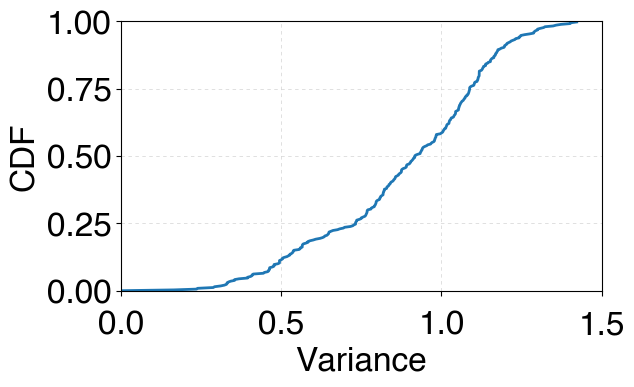

In [66]:
# pyplot configuration
plt.rcParams["figure.figsize"] = (6.2, 3.5)
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 24


fig, ax = plt.subplots(figsize=(6.2, 3.5))

# plot the cdf
ax.plot(df["std"], df.index/len(df), linewidth=2)
plt.xlabel("Variance")
plt.ylabel("CDF")
plt.ylim(0, 1)
plt.xlim(0, 1.5)
ax.xaxis.set_tick_params(pad=10)
ax.grid(True, color="lightgrey", linestyle="--", linewidth=0.5, dashes=(5,5))
plt.savefig("cdf_variance.pdf", bbox_inches="tight")

# fig 3: for a confidence level threshold `(std(scores) / sqrt(n_users))`, how many users are needed to achieve? CDF, each point is a video, x is user count

In [69]:
def scores_str_to_threshold(scores_str: str, threshold=0.15):
    score_lis = list(map(int, scores_str.split(" ")))
    result = np.array(list(map(lambda x: np.std(score_lis[:x]) / np.sqrt(x), np.arange(10, len(score_lis)))))
    good_ones = result < threshold
#     print(result, good_ones)
    return np.argmax(good_ones) + 10 if good_ones.any() else len(score_lis)
    
    
df = pd.read_csv("summary.csv")
df["num_users"] = df.apply(lambda row: scores_str_to_threshold(row["accepted scores"]), axis=1)
df = df.sort_values("num_users", ascending=True).reset_index(drop=True)
df

,video name,mos,accepted scores,rejected scores,num_users
0,original_videos_Sports_360P_Sports_360P-32d3_2...,1.212,1 2 1 1 1 1 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 3 ...,5 1 1 1 1,10
1,original_videos_Sports_720P_Sports_720P-07d0_2...,1.429,1 1 2 1 1 1 2 1 2 1 1 2 1 1 1 2 1 3 1 2 1 1 3 ...,2 4 3 1 2 2 1 2,10
2,original_videos_Sports_480P_Sports_480P-44e5_2...,1.361,2 1 1 1 1 1 2 1 1 2 3 1 2 1 1 1 2 2 2 1 1 2 1 ...,5 3 2 2 1 1 5 5,10
3,original_videos_Sports_480P_Sports_480P-44e5_2...,1.194,1 1 1 1 1 1 1 1 1 1 3 1 2 1 1 1 1 2 2 1 1 1 1 ...,5 2 1 1 1 1 5 2,10
4,FantasticFinish2013_01_04BoysBasketball_Lakevi...,1.129,1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 ...,1 1 1 1 2 1 1 2,10
...,...,...,...,...,...
335,original_videos_Sports_720P_Sports_720P-2c06_0...,2.200,2 1 1 3 3 3 1 4 4 2 2 3 3 3 3 1 1 2 1 4 2 2 2 ...,3 3 1 2 1,40
336,original_videos_Sports_720P_Sports_720P-2c06_0...,2.400,3 1 2 4 4 3 1 4 4 2 2 4 3 3 3 1 1 2 1 3 2 2 1 ...,4 3 1 5 1,40
337,original_videos_Sports_720P_Sports_720P-2c06_2...,2.350,2 1 2 3 1 2 3 4 4 3 1 3 4 4 4 4 1 1 2 1 1 2 3 ...,3 2 4 5,40
338,original_videos_Sports_720P_Sports_720P-2c06_2...,2.575,1 1 3 3 1 2 4 4 4 3 1 3 4 4 4 3 1 1 2 1 2 3 3 ...,3 5 3 5,40


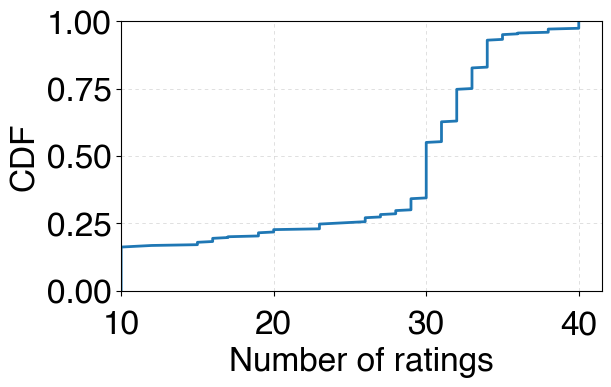

In [71]:
# pyplot configuration
plt.rcParams["figure.figsize"] = (6.2, 3.5)
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 24


fig, ax = plt.subplots(figsize=(6.2, 3.5))

# plot the cdf
ax.plot(df["num_users"], df.index/len(df), linewidth=2)
plt.xlabel("Number of ratings")
plt.ylabel("CDF")
plt.ylim(0, 1)
plt.xlim(10,)
ax.xaxis.set_tick_params(pad=10)
ax.grid(True, color="lightgrey", linestyle="--", linewidth=0.5, dashes=(5,5))
plt.savefig("cdf_num_ratings.pdf", bbox_inches="tight")